In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun
import numpy as np
import os
top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')
import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa


sys.path.append('my_funcs/')
from plot_funcs import plot_density, plot_velocity
from pipeline_main_nosink import pipeline_nosink
from pipeline_2D_nosink import to_osyris_ivs
from pipeline_main import pipeline
from pipeline_2D import to_osyris_ivs

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)


In [2]:
ramses_pos_122 = np.array([0.71907158, 0.59524271, 0.34094426])
print('DISPATCH pos:', ramses_pos_122 - 0.5)

DISPATCH pos: [ 0.21907158  0.09524271 -0.15905574]


Initialising patch data


100%|██████████| 5026/5026 [01:07<00:00, 74.73it/s] 


Looping over DISPATCH data to extract data at highest level


100%|██████████| 5016/5016 [00:16<00:00, 297.81it/s]


Setting up Osyris data structure


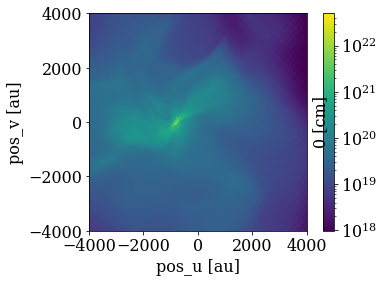

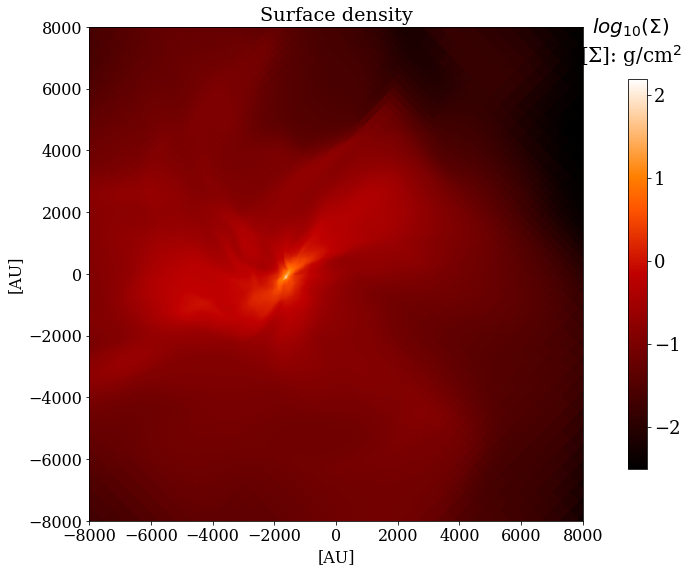

In [3]:
data_122i = pipeline_nosink(snap = 341, run = '.', sink_pos = ramses_pos_122 - 0.5, data = '/groups/astro/kxm508/codes/dispatch2/experiments/christian/sink_122/data_dispatch')
variable = ['d']
data_122i.to_osyris_ivs(variables=variable, resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_122i.osyris_ivs[0] * data_122i.cgs_density), extent = (-8e3, 8e3, -8e3, 8e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

# Pol 01 Same setting as before but with barotropic solver

Initialising patch data


100%|██████████| 5026/5026 [00:16<00:00, 300.02it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2164/2164 [00:09<00:00, 232.56it/s]


Setting up Osyris data structure


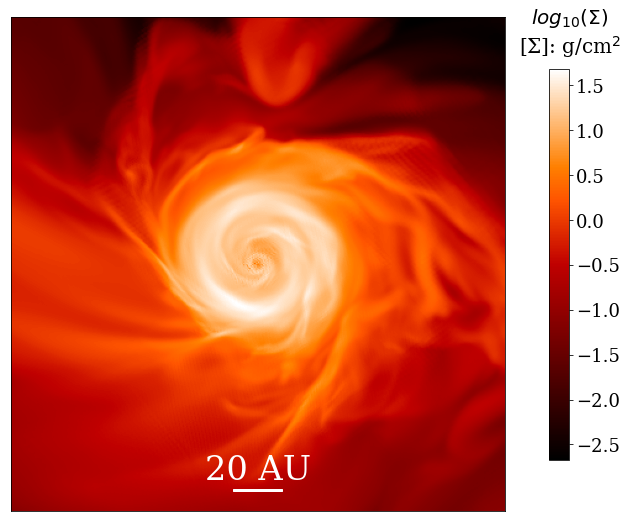

In [5]:
data_12201 = pipeline(snap=376, run='sink122pol01', sink_id=122)
data_12201.calc_L()
variable = ['d']
data_12201.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_12201.osyris_ivs[0] * data_12201.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)

axs.set_xticks([]); axs.set_yticks([])
scalebar = AnchoredSizeBar(axs.transData, 20, '20 AU', 'lower center', 
                    pad=0.5,
                    color='white',
                    
                    frameon=False,
                    fontproperties = fm.FontProperties(size=28*1.2),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)

#axs.set(title = f'T = {data_12201.time - data_122i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

# Pol 02 Barotropic solver 
## - slope_type = 3.2 (before 3.5)

Initialising patch data


100%|██████████| 5026/5026 [00:18<00:00, 275.29it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2164/2164 [00:09<00:00, 233.01it/s]


Setting up Osyris data structure


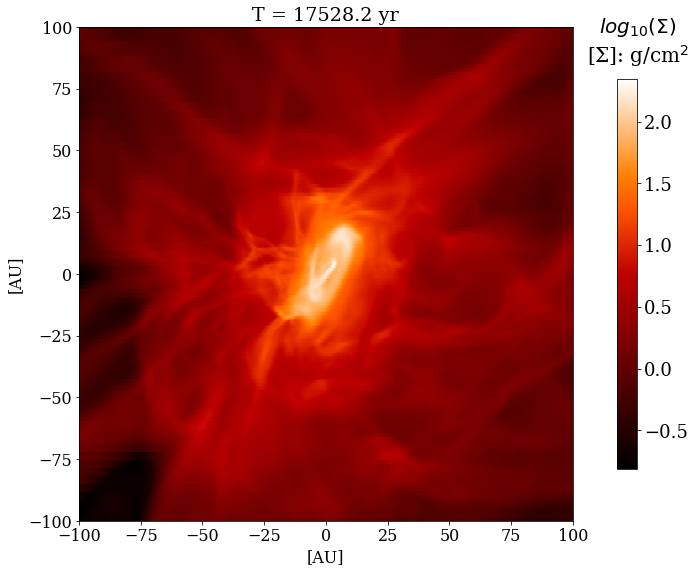

In [5]:
data_12202 = pipeline(snap=376, run='sink122pol02', sink_id=122 )
data_12202.calc_L()
variable = ['d']
data_12202.to_osyris_ivs(variables=variable, view = 200, dz = 200, viewpoint = np.cross(data_12202.L, np.array([0,0,1])))

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_12202.osyris_ivs[0] * data_12202.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T = {data_12202.time - data_122i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

# Pol 03 Barotropic solver 
## - slope_type = 3.2 (before 3.5)
## - grace 0.1 (before 0.2)

Initialising patch data


100%|██████████| 5026/5026 [00:19<00:00, 263.79it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2164/2164 [00:06<00:00, 355.43it/s]


Setting up Osyris data structure


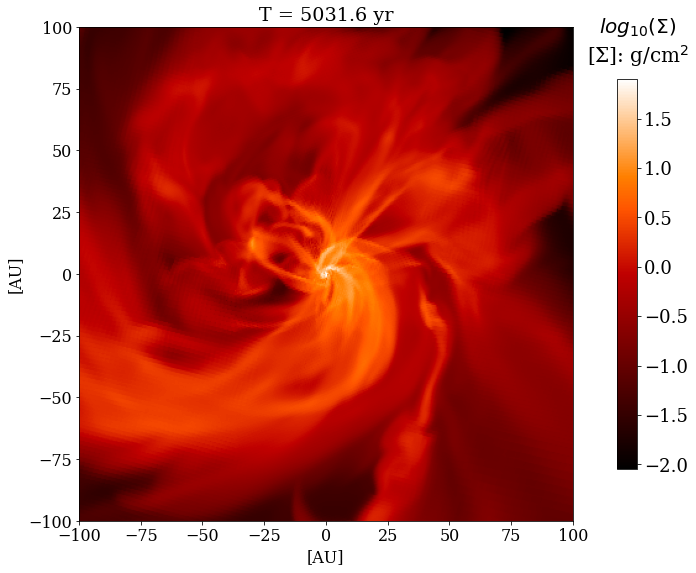

In [4]:
data_12203 = pipeline(snap=351, run='sink122pol03', sink_id=122)
data_12203.calc_L()
variable = ['d']
data_12203.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_12203.osyris_ivs[0] * data_12203.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T = {data_12203.time - data_122i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

# Pol 04 Barotropic solver 
## - slope_type = 3.2 (before 3.5)
## - grace 0.1 (before 0.2)
## - amr = t, min_jeans = 48 (16)